# PairPlot in Seaborn


https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
<br/>https://cran.r-project.org/web/packages/gapminder/README.html

M Robalinho  - 17-11-2018

Some studies In this notebook we will explore making pairplots in Python using the seaborn visualization library. We'll start with the default sns.pairplot and then look at customizing our plots using sns.PairGrids.
Used Jupyter Notebook for reference  https://github.com/WillKoehrsen/Data-Analysis/blob/master/pairplots/Pair%20Plots.ipynb

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [10]:
# matplotlib for plotting

# use Matplotlib interactively within an IPython shell 
# %matplotlib  

#  will lead to static images of your plot embedded in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

# Set text size
matplotlib.rcParams['font.size'] = 18

# Seaborn for pairplots
import seaborn as sns

sns.set_context('talk', font_scale=1.2);

## Gapminder Socioeconomic Data
We will be using GapMinder socioeconomic data: ( https://cran.r-project.org/web/packages/gapminder/README.html)  that is available in the R package gapminder. The data has been saved to a csv file which we will read into a dataframe. There are six columns in the data:

<br/>1.Country
<br/>2.Continent: useful for grouping data
<br/>3.Year: data coveres 1952-2007
<br/>4.life_exp: the life expectancy at birth
<br/>5.pop: population
<br/>6.gdp_per_cap: the per capita (per person) GDP in international dollars( https://en.wikipedia.org/wiki/Geary%E2%80%93Khamis_dollar) 

In [4]:
df = pd.read_csv('data/gapminder_data.csv')
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
# We can quickly find summary stats for the data using the describe method of a dataframe.

df.describe()

,year,life_exp,pop,gdp_per_cap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## Default Pair Plot with All Data
Let's use the entire dataset and sns.pairplot to create a simple, yet useful plot.

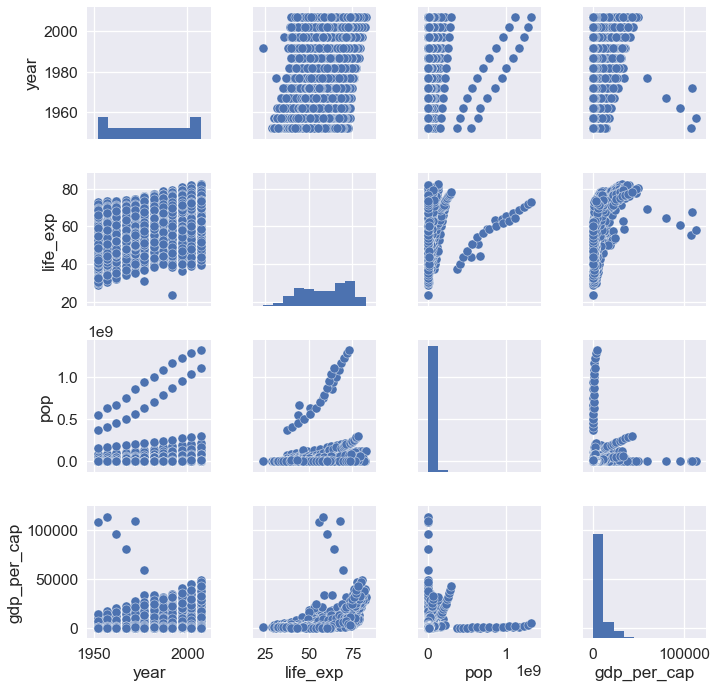

In [11]:
sns.pairplot(df);

The default pairplot shows scatter plots between variables on the upper and lower triangle and histograms along the diagonal. Already, we can see some trends such as a positive correlation between gdp_per_cap and life_exp and year and life_exp which suggests that people in richer countries live longer and that in general, people have been living longer as time increases. We can't say what causes theses trends, only that there is a correlation.

We can also see that the distribution of pop and gdp_per_cap is heavily skewed to the right. To better represent the data, we can take the log transform of those columns.

In [12]:
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdp_per_cap'])

df = df.drop(columns = ['pop', 'gdp_per_cap'])

In [14]:
df.head()

,country,continent,year,life_exp,log_pop,log_gdp_per_cap
0,Afghanistan,Asia,1952,28.801,6.925587,2.891786
1,Afghanistan,Asia,1957,30.332,6.965716,2.914265
2,Afghanistan,Asia,1962,31.997,7.011447,2.931000
3,Afghanistan,Asia,1967,34.020,7.062129,2.922309
4,Afghanistan,Asia,1972,36.088,7.116590,2.869221


## Group and Color by a Variable
In order to better understand the data, we can color the pairplot using a categorical variable and the hue keyword. First, we will color the plots by the continent.

While this plot alone can be useful in an analysis, we can find make it more valuable by coloring the figures based on a categorical variable such as continent. This is also extremely simple in seaborn! All we need to do is use the hue keyword in the sns.pairplot function call:

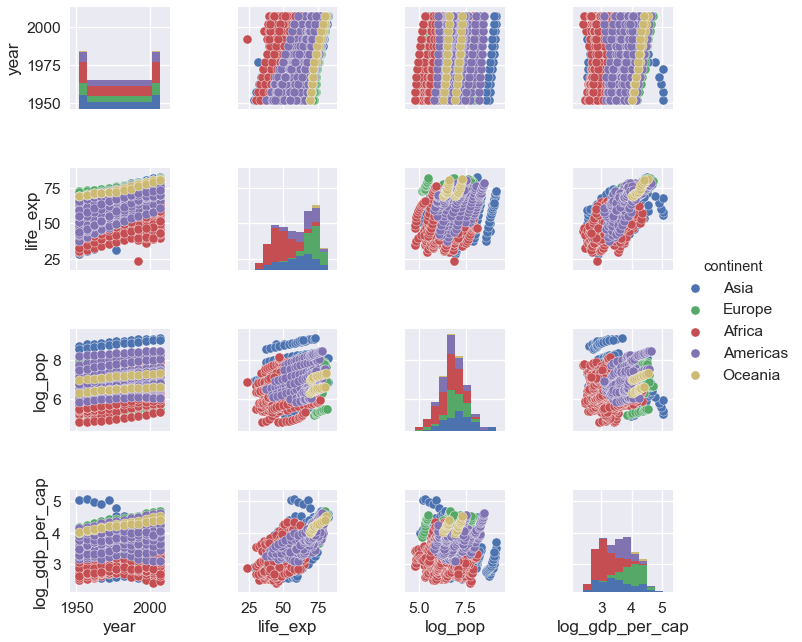

In [15]:
matplotlib.rcParams['font.size'] = 40
sns.pairplot(df, hue = 'continent');

## Customizing pairplot
First, let's change the diagonal from a histogram to a kde which can better show the differences between continents. We can also adjust the alpha (intensity) of the scatter plots to better show all the data and change the size of the markers on the scatter plot. Finally, I increase the size of all the plots to better show the data.

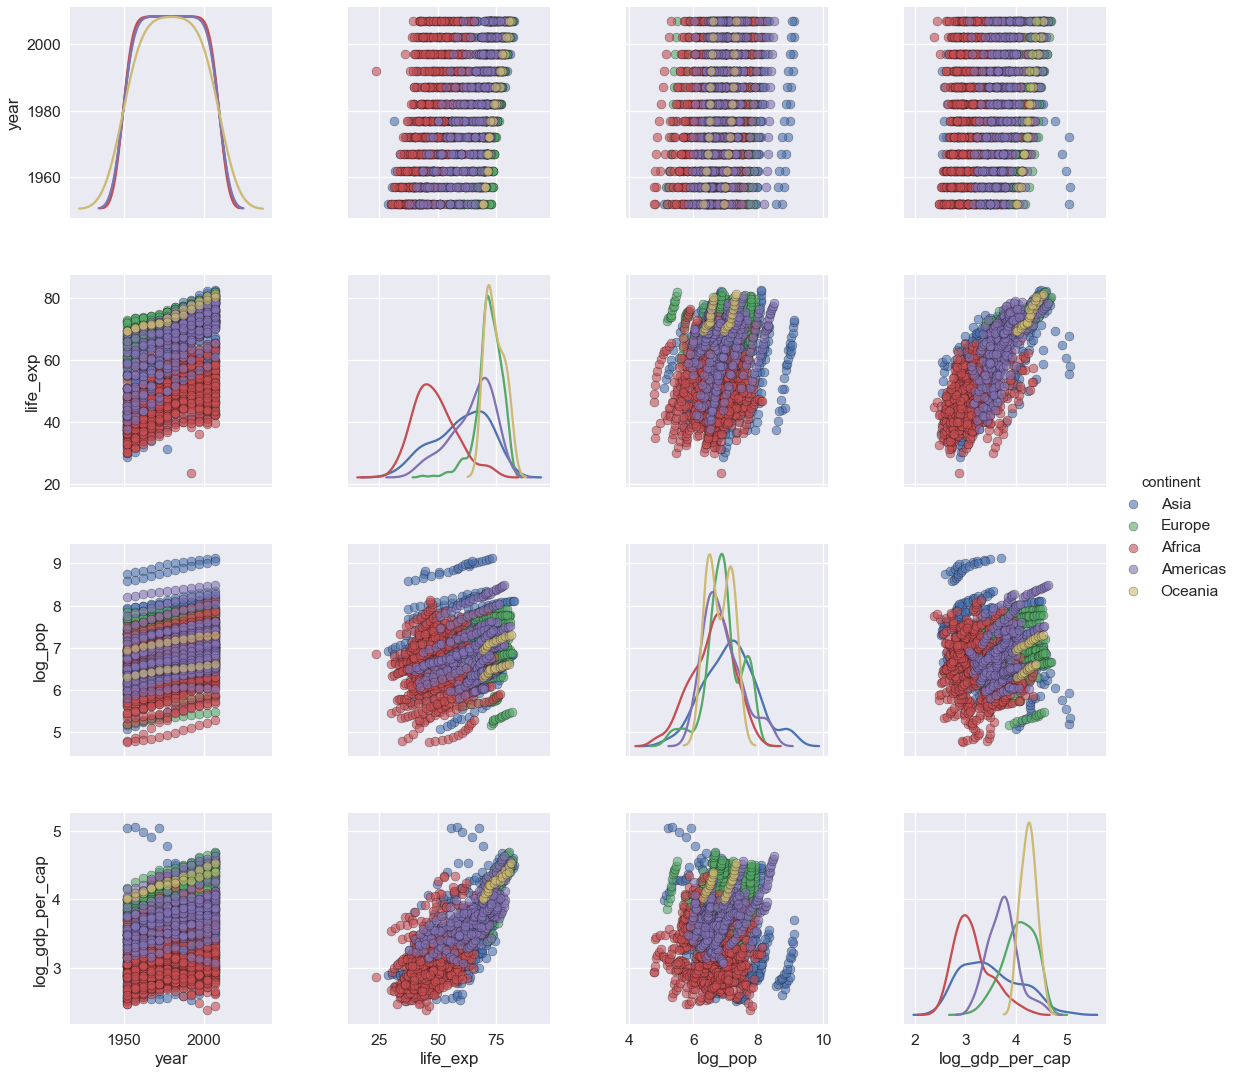

In [17]:
sns.pairplot(df, hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);

That makes some of the trends more clear. We can see that Oceania and Europe tend to have the highest life expectancy and highest GDP with Asian countries tending to have the greatest population. The density plots on the diagonal are better for when we have data in multiple categories to make comparisons. We can color the plot by any variable we like. For example, here is a plot colored by a decade categorical variable we create from the year column.

In [18]:
df['decade'] = pd.cut(df['year'], bins = range(1950, 2010, 10))
df.head()

,country,continent,year,life_exp,log_pop,log_gdp_per_cap,decade
0,Afghanistan,Asia,1952,28.801,6.925587,2.891786,"(1950, 1960]"
1,Afghanistan,Asia,1957,30.332,6.965716,2.914265,"(1950, 1960]"
2,Afghanistan,Asia,1962,31.997,7.011447,2.931000,"(1960, 1970]"
3,Afghanistan,Asia,1967,34.020,7.062129,2.922309,"(1960, 1970]"
4,Afghanistan,Asia,1972,36.088,7.116590,2.869221,"(1970, 1980]"


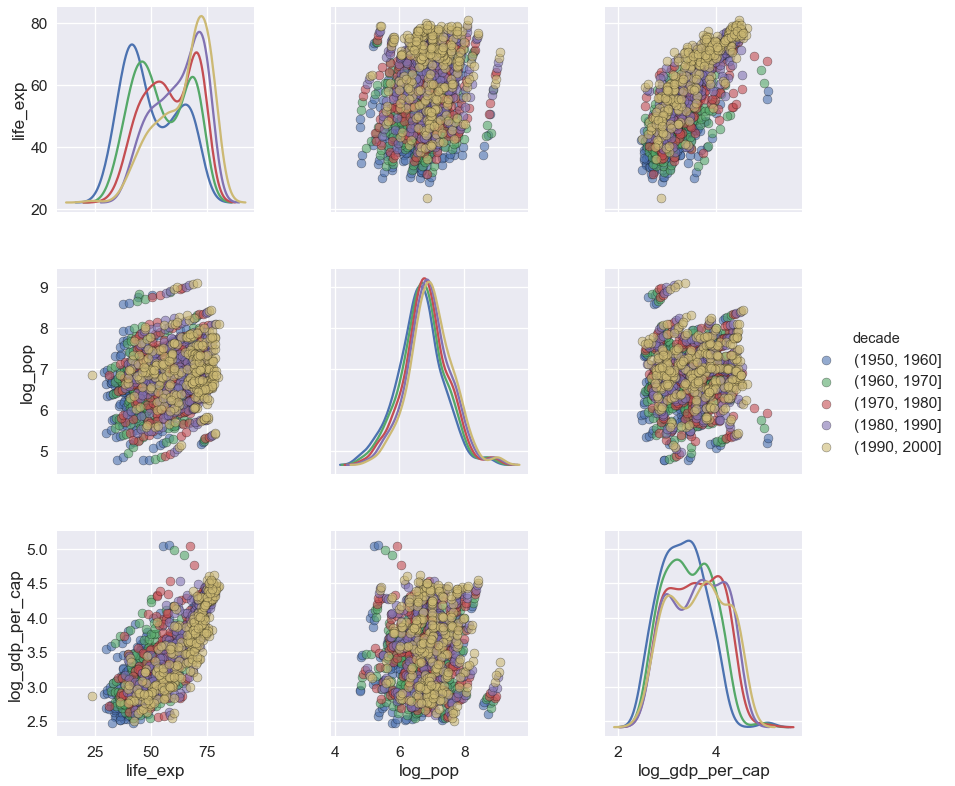

In [19]:
sns.pairplot(df, hue = 'decade', diag_kind = 'kde', vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'],
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);

Let's limit ourselves to the most recent year in the data. Notice how we must now use the vars keyword to specify the variables we want to plot. It does not make sense to plot the year variable since it no longer varies. We will limit the plot to the three remaining numerical variables.

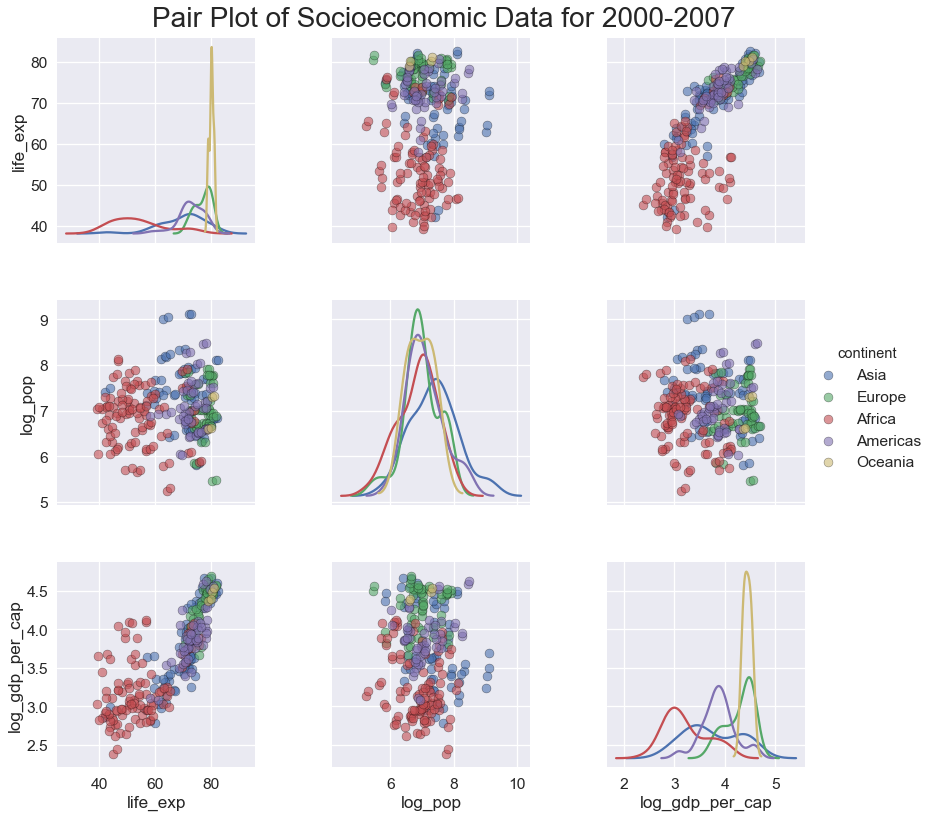

In [20]:
sns.pairplot(df[df['year'] >= 2000], vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], 
             hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pair Plot of Socioeconomic Data for 2000-2007', size = 28);

# More Customization with sns.PairGrid
This allows us to define our own functions to map to the lower and upper triangles and the diagonal. For example, we might want a plot that instead of showing two instaces of the scatter plots, shows the Pearson Correlation coefficient (a measure of a linear trend) on one of the triangles. To do this, we can just write a function to calculate the statistic and then map it to the appropriate part of the plot.

First, we will show the basic usage of sns.PairGrid. Here, we map a scatter plot to the upper triangle, a density plot to the diagonal, and a 2D density plot to the lower triangle. PairGrid is a class and not a function, which means that we need to create an instance and then use methods of that instance to build a plot. Then, after we have added all the methods to the instance, we can show the resulting plot.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


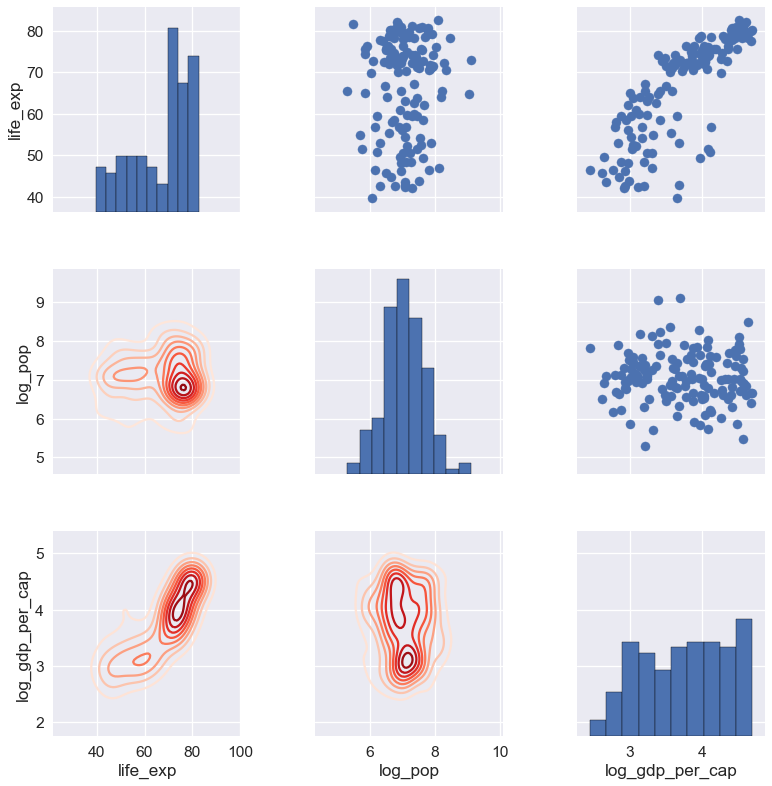

In [24]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map different plots to different sections
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred', edgecolor = 'k');

Now that we see how to map different functions to the different elements, we can write out own function to put on the plot. We'll use a simple function to show the correlation coffiecients on the scatterplot. (Thanks to this Stack Overflow answer for help on how to write a custom function and map it onto the plot).

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


TypeError: hist() got multiple values for keyword argument 'color'

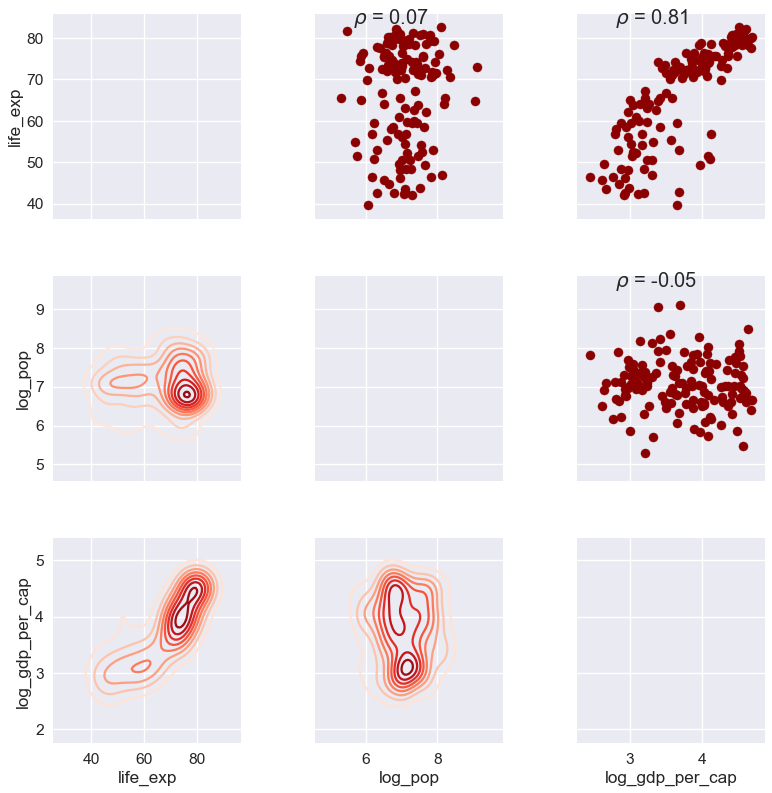

In [25]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

We can map any function we would like to any of the areas. For example, maybe we would like to show the summary stats on the diagonal.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

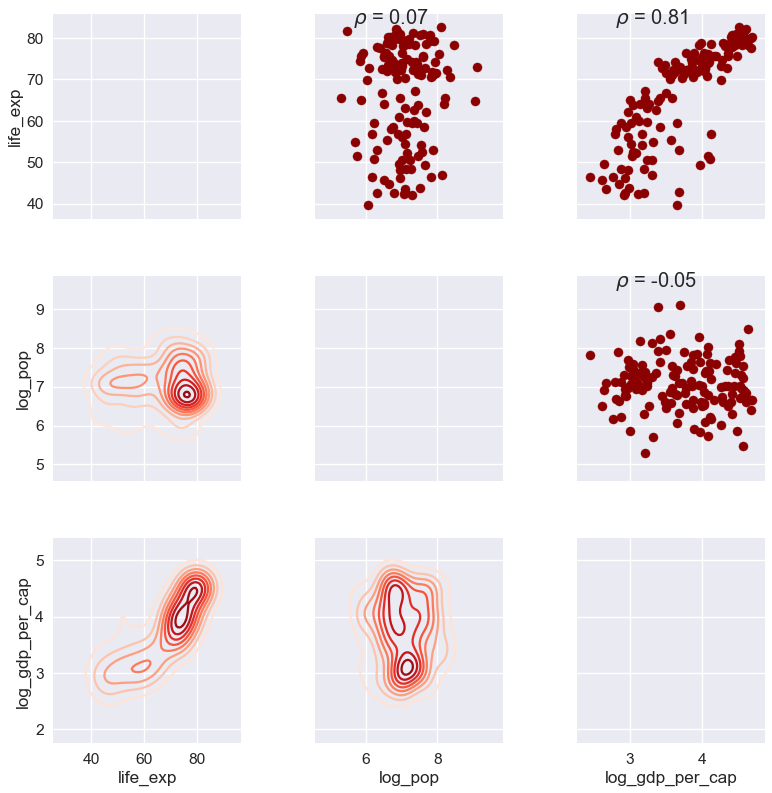

In [26]:
# Define a summary function
def summary(x, **kwargs):
    # Convert to a pandas series
    x = pd.Series(x)
    
    # Get stats for the series
    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
    
    # Convert from log to regular scale
    # Adjust the column names for presentation
    if label.name == 'log_pop':
        label = 10 ** label
        label.name = 'pop stats'
    elif label.name == 'log_gdp_per_cap':
        label = 10 ** label
        label.name = 'gdp_per_cap stats'
    else:
        label.name = 'life_exp stats'
       
    # Round the labels for presentation
    label = label.round()
    ax = plt.gca()
    ax.set_axis_off()

    # Add the labels to the plot
    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes)    
    

# Create a pair grid instance
grid = sns.PairGrid(data= df[df['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Fill in the mappings
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(summary);